# Descripción

La finalidad del proyecto es desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Se realizaron pruebas de Machine Learning en los modelos de árbol de decisiones, bosque aleatorio y regresión logística, además de una prueba de cordura.



## Información general

### Inicialización

In [25]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import choices
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [26]:
try:
    users=pd.read_csv('users_behavior.csv')
except:
    users=pd.read_csv('/datasets/users_behavior.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


El dataset 'users' contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:
- сalls — número de llamadas,
- minutes — duración total de la llamada en minutos,
- messages — número de mensajes de texto,
- mb_used — Tráfico de Internet utilizado en MB,
- is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).

In [27]:
users.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [28]:
users.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


No se encontraron valores nulos ni tipos de datos incorrectos.

## Segmentación de datos

El dataset 'users' es dividido en dos datasets 'features' y 'target' donde features será el dataset que contiene las variables que guiarán al modelo para predecir si el objetivo target recomienda el plan ultra o no.

In [29]:
features=users.drop(['is_ultra'],axis=1)
target=users['is_ultra']

Separamos el dataset en conjuntos de entrenamiento (train), validación (valid) y de prueba (test).

In [30]:
features, features_test, target, target_test = train_test_split(features,target,test_size=0.2,random_state=54321)
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size = 0.25, random_state=54321)

## Evaluación de modelos de Machine Learning

Debido a que queremos predecir una variable categórica, usaremos los modelos de clasificación: árbol de decisiones, bosque aleatorio y regresión logística.

### Árbol de decisiones

Se realizó una iteración para encontrar el mejor modelo variando la profundidad máxima de 1 a 10.

In [31]:
users['is_ultra'].value_counts(normalize = True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

In [32]:
best_score=0
best_depth=0

for depth in range(1,11):
    model_tree = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model_tree.fit(features_train,target_train)
    predictions_valid=model_tree.predict(features_valid)
    score=accuracy_score(target_valid,predictions_valid)
    if score > best_score:
        best_score = score
        best_depth = depth   
    
print("Accuracy del mejor modelo en el conjunto de validación (best depth = {}): {}".format(best_depth, best_score))

Accuracy del mejor modelo en el conjunto de validación (best depth = 5): 0.8180404354587869


Evaluamos el modelo en el conjunto de entrenamiento para verificar si hay overfitting.

In [33]:
model_tree = DecisionTreeClassifier(random_state=54321, max_depth=5)
model_tree.fit(features_train,target_train)
predictions_train=model_tree.predict(features_train)
score=accuracy_score(target_train,predictions_train)
print("Accuracy del mejor modelo en el conjunto de entrenamiento (best depth = {}): {}".format(best_depth, score))

Accuracy del mejor modelo en el conjunto de entrenamiento (best depth = 5): 0.8246887966804979


Debido a la poca variación entre el conjunto de prueba y de validación, concluímos que el modelo no está sobreajustado.

Se encontró que, para el modelo de árbol de decisiones, el hiperparámetro que brinda un mejor accuracy es max_depth = 5.

### Bosque aleatorio

Se realizó una iteración para encontrar el mejor modelo variando el número de estimadores de 1 a 10.

In [34]:
best_score = 0
best_est = 0
for est in range(1, 11): 
    model_forest = RandomForestClassifier(random_state=54321, n_estimators=est) 
    model_forest.fit(features_train,target_train) 
    score = model_forest.score(features_valid,target_valid) 
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))



Accuracy del mejor modelo en el conjunto de validación (n_estimators = 10): 0.8258164852255054


Evaluamos el modelo en el conjunto de entrenamiento para verificar si hay overfitting.

In [35]:
model_forest = RandomForestClassifier(random_state=54321, n_estimators=10) 
model_forest.fit(features_train,target_train) 
predictions_train=model_forest.predict(features_train)
score=accuracy_score(target_train,predictions_train)

print("Accuracy del mejor modelo en el conjunto de entrenamiento (n_estimators = {}): {}".format(best_est, score))

Accuracy del mejor modelo en el conjunto de entrenamiento (n_estimators = 10): 0.9740663900414938


El valor de accuracy en el conjunto de entrenamiento en comparación con el validación nos indica que hay un sobreajuste.

Se encontró que, para el modelo de bosque aleatorio, el hiperparámetro que brinda un mejor accuracy es n_estimators = 10.

### Regresión logística

En este modelo se usó como hiperparámetro solver = 'liblinear'.

In [47]:
model_reg = LogisticRegression(random_state=54321,solver='liblinear') 
model_reg.fit(features_train,target_train) 
score_valid = model_reg.score(features_valid,target_valid) 

print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)

Accuracy del modelo de regresión logística en el conjunto de validación: 0.776049766718507


Evaluamos el modelo en el conjunto de entrenamiento para verificar si hay overfitting.

In [49]:
model_reg.fit(features_train,target_train) 
score_train = model_reg.score(features_train,target_train) 

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.7505186721991701


El valor de accuracy en el conjunto de entrenamiento nos indica que no hay un sobreajuste.

### Conclusiones

- El mejor modelo de árbol de decisiones brinda un accuracy de 0.8180404 con profundidad máxima = 5.
- El mejor modelo de bosque aleatorio brinda un accuracy de 0.8258164 con número de estimadores = 10.
- El modelo de regresión logística brinda un accuracy de 0.7760497.
- Comparando los accuracy obtenidos en los conjuntos de validación, el mejor modelo sería el de bosque aleatorio, seguido de árbol de decisiones.
- El modelo de bosquea aleatorio es el modelo que genera un sobreajuste muy alto; sin embargo, continúa brindando un mejor valor de precisión.

## Comprobación en conjuntos de prueba

### Árbol de decisiones

Ejecutamos el modelo de árbol de decisiones con el hiperparámetro max_depth = 5.

In [37]:
model_tree = DecisionTreeClassifier(random_state=54321, max_depth=5)
model_tree.fit(features_train,target_train)
predictions_test=model_tree.predict(features_test)
score_tree=accuracy_score(target_test,predictions_test)
    
print("Accuracy de árbol de decisiones en el conjunto de prueba: {}".format(score_tree))

Accuracy de árbol de decisiones en el conjunto de prueba: 0.7698289269051322


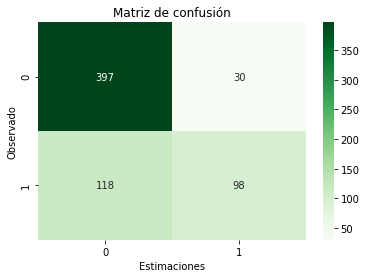

In [38]:
cnf = confusion_matrix(target_test, predictions_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de árbol de decisiones predice en un gran número de estimaciones de 0 igual al observado; sin embargo, el número de estimaciones de 1 igual al observado es de 98. Este modelo brinda un valor de accuracy igual a 0.7698.

### Bosque aleatorio

Ejecutamos el modelo de bosque aleatorio con el hiperparámetro n_estimators = 10.

In [39]:
model_forest = RandomForestClassifier(random_state=54321, n_estimators=10) 
model_forest.fit(features_train,target_train) 
predictions_test=model_forest.predict(features_test)
score_forest = model_forest.score(features_test,target_test) 
print("Accuracy de bosque aleatorio en el conjunto de prueba: {}".format(score_forest))


Accuracy de bosque aleatorio en el conjunto de prueba: 0.7838258164852255


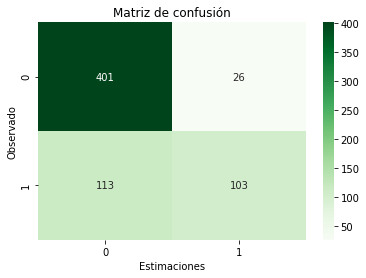

In [40]:
cnf = confusion_matrix(target_test, predictions_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de árbol de decisiones predice en un gran número de estimaciones de 0 igual al observado; sin embargo, el número de estimaciones de 1 igual al observado es de 103. Este modelo brinda un valor de accuracy igual a 0.7838.

### Regresión logística

Ejecutamos el modelo de regresión logística.

In [41]:

model_reg = LogisticRegression(random_state=54321,solver='liblinear') 
model_reg.fit(features_train,target_train) 
score_reg = model_reg.score(features_test,target_test) 

print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_reg)

Accuracy del modelo de regresión logística en el conjunto de prueba: 0.7091757387247278


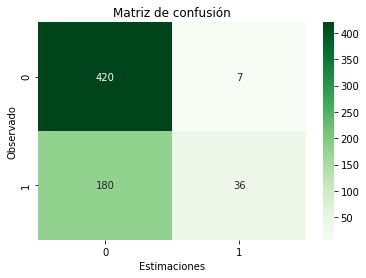

In [42]:
predictions_test=model_reg.predict(features_test)
cnf = confusion_matrix(target_test, predictions_test)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

El modelo de regresión logística predice en un gran número de estimaciones de 0 igual al observado; sin embargo, el número de estimaciones de 1 igual al observado es de 36. Este modelo brinda un valor de accuracy igual a 0.7091.

### Prueba de cordura

Sabiendo que un cierto porcentaje de la columna 'is_ultra' es 1, extrayendo un conjunto aleatorio el porcentaje debería ser similar.

In [43]:
users['is_ultra'].mean()

0.30647168637212197

Creamos un conjunto de datos del tamaño de 'target_test' en donde el 30 % de los datos sea 1 de forma aleatoria.

In [44]:
opciones = [0,0,0,0,0,0,0,1,1,1]
random.seed(54321)
cordura=choices(opciones, k=len(target_test))

In [45]:
accuracy_score(target_test,cordura)

0.6034214618973561

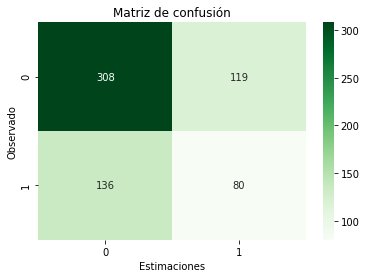

In [46]:
cnf = confusion_matrix(target_test, cordura)

sns.heatmap(cnf, annot=True, fmt='.0f', cmap='Greens')
plt.title('Matriz de confusión')
plt.xlabel('Estimaciones')
plt.ylabel('Observado')
plt.show()

Un conjunto aleatorio acierta en un gran número de estimaciones de 0 igual al observado; sin embargo, el número de estimaciones de 1 igual al observado es bajo. La prueba de cordura brinda un valor de  accuracy igual a 0.603.

## Conclusiones

- Todos los modelos, incluyendo la prueba de cordura,  brindaron grandes estimaciones del valor de 0 acertadas.
- La prueba de cordura acertó en la predicción del valor de 1 en más ocaciones que en el modelo de regresión logística; sin embargo, el valor de accuracy es superior en la regresión logística.
- Solo los modelos árbol de decisiones y bosque aleatorio superaron el umbral de exactitud (0.75)
- Todos los modelos disminuyeron el valor del accuracy en los conjuntos de prueba.
- El modelo que brindó un mejor valor de accuracy fue el bosque aleatorio (0.7838) seguido del árbol de decisiones (0.7698).
- El modelo bosque aleatorio generó un sobreajuste muy alto y debido a la poca diferencia con el árbol de decisiones, este último podría considerarse como un modelo más adecuado.